# Total Variation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Optimal Path to Roll a Ball Down a Hill

Using $20$ $x$ steps, $250$ time steps, $a=-1$, $b=1$, $\alpha = 1$, $\beta=7$, and a final time of $0.2$, we plot the curve that minimizes the time for a ball to role from a starting point to a lower ending point.

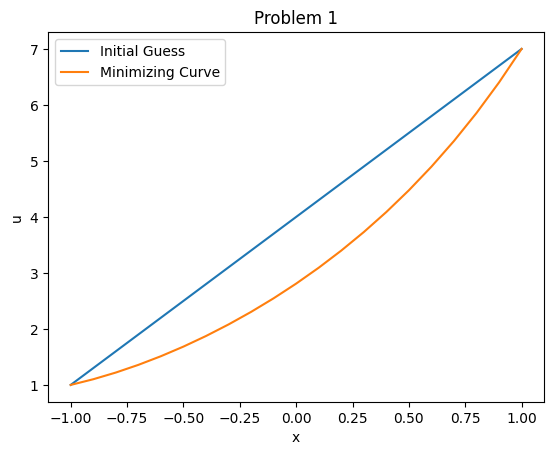

Difference in iterations is  0.0
Final time =  0.2


In [3]:
a = -1
b = 1
alpha = 1
beta = 7
tf = 0.2
tsteps = 250
xsteps = 20
t = np.linspace(0, tf, tsteps+1)
x0 = np.linspace(a, b, xsteps+1)
dt = t[1] - t[0]
dx = x0[1] - x0[0]

# Check a stability condition for this numerical method
if dt/dx**2 > 0.5:
    print("stability condition fails")

def rhs(y):
    # Approximate first and second derivatives to second order accuracy.
    yp = (np.roll(y,-1) - np.roll(y,1))/(2.*dx)
    ypp = (np.roll(y,-1) - 2.*y + np.roll(y,1))/dx**2.
    # Find approximation for the next time step, using a first order Euler step
    y[1:-1] -= dt*(1. + yp[1:-1]**2. - 1.*y[1:-1]*ypp[1:-1])
    return y

u = np.empty((2, xsteps+1))
u[0] = (beta - alpha)/(b-a)*(x0-a) + alpha
u[1] = (beta - alpha)/(b-a)*(x0-a) + alpha

# plot the initial guess
plt.plot(x0, u[0], label="Initial Guess")

# Time step until successive iterations are close
iteration = 0
while iteration < tsteps:
    u[1] = rhs(u[1])
    if norm(np.abs((u[0] - u[1]))) < 1e-5: break
    u[0] = u[1]
    iteration+=1

# Plot the solution
plt.plot(x0, u[1], label="Minimizing Curve")

plt.xlabel('x')
plt.ylabel('u')
plt.title("Problem 1")
plt.legend()
plt.show()

print("Difference in iterations is ", norm(np.abs((u[0] - u[1]))))
print("Final time = ", iteration*dt)

# Image Diffusion

Using $\Delta t = 1e{-3},$ $\lambda = 40,$ $\Delta x = 1,$ and $\Delta y = 1$, we implement a numerical scheme to obtain a solution $u$. (So $\Omega = [0,n_x]\times [0,n_y]$, where $n_x$ and $n_y$ represent the number of pixels in the $x$ and $y$ dimensions, respectively.) We take 250 steps in time. We plot the original image as well as the image with noise. 

In [4]:
from numpy.random import randint, uniform, randn
import matplotlib.pyplot as plt
from matplotlib import cm
from imageio.v2 import imread, imwrite

dir = ""
imagename = 'balloons_color.jpg'
changed_pixels = 40000


# Read the color image and convert to grayscale
IM = imread(dir + imagename, mode='L').astype(float) / 255.0

IM_x, IM_y = IM.shape

for lost in range(changed_pixels):
    x_, y_ = randint(1, IM_x-2), randint(1, IM_y-2)
    val = 0.1 * randn() + 0.5
    IM[x_, y_] = max(min(val, 1.0), 0.0)

# Convert back to 8-bit representation
IM = (IM * 255).astype(np.uint8)

# Save the noised grayscale image
imwrite(dir + "noised_" + imagename, IM)

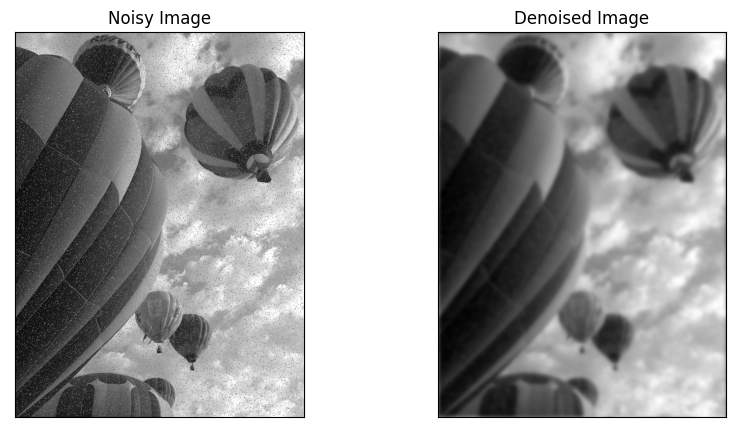

In [21]:
dt = 1e-3
lam = 40
dx = 1
dy = 1
tsteps = 250

# Initialize the solution
f,u = np.copy(IM.astype(float)), np.copy(IM.astype(float))

# Time step until successive iterations are close
def rhs(_u):
    ut = _u.copy()
    u_xx = np.roll(ut, -1, axis=1) - 2*ut + np.roll(ut, 1, axis=1) # delta_x is 1
    u_yy = np.roll(ut, -1, axis=0) - 2*ut + np.roll(ut, 1, axis=0) # delta_y is 1
    ut += dt*(-ut + f + lam*(u_xx + u_yy)) # update
    return ut
    
for _ in range(tsteps):
    u_new = rhs(u)
    if np.linalg.norm(np.abs((u_new - u))) < 1e-5: 
        break
    u = u_new


# plot the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(IM, cmap=cm.gray)
plt.title("Noisy Image")
plt.xticks([])
plt.yticks([])

# plot the denoised image
plt.subplot(1, 2, 2)
plt.imshow(u, cmap=cm.gray)
plt.title("Denoised Image")
plt.xticks([])
plt.yticks([])

plt.show()

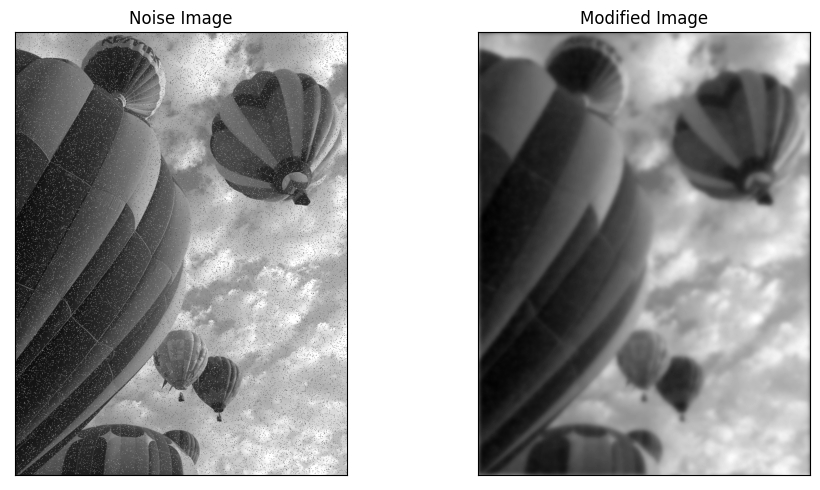

In [ ]:
# initialize solution parameters
f, u = np.copy(IM), np.copy(IM)
dt = 1e-3
lam = 40
dx = 1
dy = 1
tsteps = 250
tol = 1e-5

# define the right hand side for the PDE
def rhs(ut):
    u_xx = np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)
    u_yy = np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)
    ut = ut + dt*(-ut + f + lam*(u_xx + u_yy))
    return ut

# iterate until successive iterations are close
for _ in range(tsteps):
    u_new = rhs(u)
    if np.linalg.norm(np.abs((u_new - u))) < tol: 
        break
    u = u_new
    
# plot the original noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Noise Image")
plt.imshow(IM,cmap="gray")
plt.xticks([])
plt.yticks([])

# plot the denoised image
plt.subplot(1, 2, 2)
plt.title("Modified Image")
plt.imshow(u, cmap="gray")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
diff_u = np.copy(u)

# Image Enhancement

Using $\Delta t = 1e-3, \lambda = 1, \Delta x = 1,$ and $ \Delta y = 1$, we implement a numerical scheme to obtain a solution $u$. We take 200 steps in time. We display both the diffusion-based and total variaton images of the balloon. 

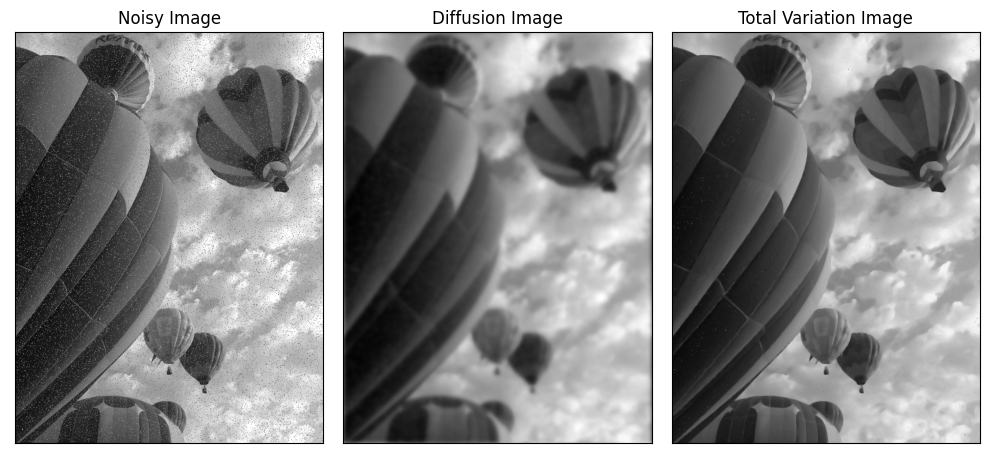

Epsilon should be  0.0001


In [ ]:
# just making some copies
f, u = np.copy(IM), np.copy(IM)

# initialize solution parameters
dt = 1e-3
lam = 1
dx = 1
dy = 1
tsteps = 200
tol = 1e-5
eps = 1e-4

# define the right hand side for the PDE
def rhs(ut):
    # compute partials
    u_x = (np.roll(u,-1,axis=1) - np.roll(u,1,axis=1))/2.
    u_y = (np.roll(u,-1,axis=0) - np.roll(u,1,axis=0))/2.
    u_xx = np.roll(u,-1,axis=1) - 2*u + np.roll(u,1,axis=1)
    u_yy = np.roll(u,-1,axis=0) - 2*u + np.roll(u,1,axis=0)
    u_xy = (np.roll(u_x,-1,axis=0) - np.roll(u_x,1,axis=0))/2.

    # update and return
    top = u_xx*u_y**2. + u_yy*u_x**2. - 2*u_x*u_y*u_xy
    bot = (u_x**2. + u_y**2. + eps)**(3/2)
    return ut + dt*(lam*(f - ut) + top/bot)

# iterate until successive iterations are close
for _ in range(tsteps):
    u_new = rhs(u)
    if np.linalg.norm(np.abs((u_new - u))) < tol: 
        break
    u = u_new
    
# plot the original noisy image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(IM, cmap="gray")
plt.xticks([])
plt.yticks([])

# plot the denoised image from problem 2
plt.subplot(1, 3, 2)
plt.title("Diffusion Image")
plt.imshow(diff_u, cmap="gray")
plt.xticks([])
plt.yticks([])

# plot the denoised image for this problem
plt.subplot(1, 3, 3)
plt.title("Total Variation Image")
plt.imshow(u, cmap="gray")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

print("Epsilon should be:", eps)